# SetUP

In [1]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/")

In [2]:
suppressPackageStartupMessages({
library(dplyr)
library(tidyverse)
library(data.table)
library(GENOVA)
library(HiTC)
})

# load data

# humanBrain

## 500kb

In [ ]:
RG <- load_contacts(
    signal_path = './juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic',
    resolution = 500000,
    sample_name = "RG",
    scale_cis = TRUE,
    balancing = FALSE,
    scale_bp=NULL,
    colour = rgb(46,132,176,maxColorValue = 255))

In [ ]:
iPC <- load_contacts(
    signal_path = './juicer/humanBrain_1k_PFC_APPEND/iPC.all.allValidPairs.hic',
    resolution = 500000,
    sample_name = "iPC",
    scale_cis = TRUE,
    balancing = FALSE,
    scale_bp=NULL,
    colour = rgb(46,132,176,maxColorValue = 255))

In [ ]:
eN <- load_contacts(
    signal_path = './juicer/humanBrain_1k_PFC_APPEND/eN.all.allValidPairs.hic',
    resolution = 500000,
    sample_name = "eN",
    scale_cis = TRUE,
    balancing = FALSE,
    scale_bp=NULL,
    colour = rgb(46,132,176,maxColorValue = 255))

In [ ]:
write.table(RG$MAT,"./juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic.500kb.mat",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(RG$MAT,"./juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic.500kb.mat",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(iPC$MAT,"./juicer/humanBrain_1k_PFC_APPEND/iPC.all.allValidPairs.hic.500kb.mat",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(iPC$IDX,"./juicer/humanBrain_1k_PFC_APPEND/iPC.all.allValidPairs.hic.500kb.idx",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(RG$IDX,"./juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic.500kb.idx",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(eN$IDX,"./juicer/humanBrain_1k_PFC_APPEND/eN.all.allValidPairs.hic.500kb.idx",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
library(HiTC)

In [ ]:
RG.mat <- importC(con="./juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic.500kb.mat",rm.trans = T,
        xgi.bed = "./juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic.500kb.idx",
        ygi.bed = "./juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic.500kb.idx")

In [ ]:
iPC.mat <- importC(con="./juicer/humanBrain_1k_PFC_APPEND/iPC.all.allValidPairs.hic.500kb.mat",rm.trans = T,
        xgi.bed = "./juicer/humanBrain_1k_PFC_APPEND/iPC.all.allValidPairs.hic.500kb.idx",
        ygi.bed = "./juicer/humanBrain_1k_PFC_APPEND/iPC.all.allValidPairs.hic.500kb.idx")

In [ ]:
eN.mat <- importC(con="./juicer/humanBrain_1k_PFC_APPEND/eN.all.allValidPairs.hic.500kb.mat",,rm.trans = T,
        xgi.bed = "./juicer/humanBrain_1k_PFC_APPEND/eN.all.allValidPairs.hic.500kb.idx",
        ygi.bed = "./juicer/humanBrain_1k_PFC_APPEND/eN.all.allValidPairs.hic.500kb.idx")

In [ ]:
RGnpc2 <- lapply(1:22,function(idx){
    pca.hic(RG.mat[[idx]], normPerExpected=TRUE, method="loess", npc=2) %>% as.data.frame() 
})

In [ ]:
iPCnpc2 <- lapply(1:22,function(idx){
    pca.hic(iPC.mat[[idx]], normPerExpected=TRUE, method="loess", npc=2) %>% as.data.frame() 
})

In [ ]:
eNnpc2 <- lapply(1:22,function(idx){
    pca.hic(eN.mat[[idx]], normPerExpected=TRUE, method="loess", npc=2) %>% as.data.frame() 
})

In [ ]:
RG.p1 <- do.call(rbind,RGnpc2[c(1:8,10:20,22)]) %>% filter(group_name=="PC1")
RG.p2 <- do.call(rbind,RGnpc2[-c(1:8,10:20,22)]) %>% filter(group_name=="PC2")
RG.pc.beforeAdj <- rbind(RG.p1,RG.p2)

In [ ]:
iPC.p1 <- do.call(rbind,iPCnpc2[c(1:8,10:20,22)]) %>% filter(group_name=="PC1")
iPC.p2 <- do.call(rbind,iPCnpc2[-c(1:8,10:20,22)]) %>% filter(group_name=="PC2")
iPC.pc.beforeAdj <- rbind(iPC.p1,iPC.p2)

In [ ]:
eN.p1 <- do.call(rbind,eNnpc2[c(1:8,10:20,22)])%>% filter(group_name=="PC1")
eN.p2 <- do.call(rbind,eNnpc2[-c(1:8,10:20,22)])%>% filter(group_name=="PC2")
eN.pc.beforeAdj <- rbind(eN.p1,eN.p2)

In [ ]:
eN.peaks.gr <- read.table("./cleanData/MACS2.narrowPeak/human/humanBrain_1k_PFC/mergePeak/peaks//eN.mergeTocall.peak.FDR.filtered.narrowPeaks") %>%
set_names("seqnames","start","end","ID",c(paste0("V",5:11))) %>% makeGRangesFromDataFrame()

In [ ]:
iPC.peaks.gr <- read.table("./cleanData/MACS2.narrowPeak/human/humanBrain_1k_PFC/mergePeak/peaks//iPC.mergeTocall.peak.FDR.filtered.narrowPeaks") %>%
set_names("seqnames","start","end","ID",c(paste0("V",5:11))) %>% makeGRangesFromDataFrame()

In [ ]:
RG.peaks.gr <- read.table("./cleanData/MACS2.narrowPeak/human/humanBrain_1k_PFC/mergePeak/peaks//RG.mergeTocall.peak.FDR.filtered.narrowPeaks") %>%
set_names("seqnames","start","end","ID",c(paste0("V",5:11))) %>% makeGRangesFromDataFrame()

In [ ]:
#RG.pc.beforeAdj$seqnames <- paste0("chr",RG.pc.beforeAdj$seqnames)
#eN.pc.beforeAdj$seqnames <- paste0("chr",eN.pc.beforeAdj$seqnames)
iPC.pc.beforeAdj$seqnames <- paste0("chr",iPC.pc.beforeAdj$seqnames)

In [ ]:
RG.comp.adj <- lapply(paste0("chr",1:22),function(idx){
    dat <- RG.pc.beforeAdj %>% filter(seqnames==idx) 
    dat.gr <- makeGRangesFromDataFrame(dat,keep.extra.columns = T)
    dat.res <- dat %>% mutate(gene.counts=countOverlaps(dat.gr,RG.peaks.gr)) %>% 
     mutate(group=case_when(score <0 ~ "N",
                            score >0 ~ "P")) %>%
group_by(seqnames,group) %>% summarise(gene.counts.sum=sum(gene.counts))
    
if(dat.res[2,3] > dat.res[1,3]){
    dat$score.adj <- dat$score
}else(
    dat$score.adj <- -(dat$score)
)
    return(dat)
})

In [ ]:
iPC.comp.adj <- lapply(paste0("chr",1:22),function(idx){
    dat <- iPC.pc.beforeAdj %>% filter(seqnames==idx) 
    dat.gr <- makeGRangesFromDataFrame(dat,keep.extra.columns = T)
    dat.res <- dat %>% mutate(gene.counts=countOverlaps(dat.gr,iPC.peaks.gr)) %>% 
     mutate(group=case_when(score <0 ~ "N",
                            score >0 ~ "P")) %>%
group_by(seqnames,group) %>% summarise(gene.counts.sum=sum(gene.counts))
    
if(dat.res[2,3] > dat.res[1,3]){
    dat$score.adj <- dat$score
}else(
    dat$score.adj <- -(dat$score)
)
    return(dat)
})

In [ ]:
eN.comp.adj <- lapply(paste0("chr",1:22),function(idx){
    dat <- eN.pc.beforeAdj %>% filter(seqnames==idx) 
    dat.gr <- makeGRangesFromDataFrame(dat,keep.extra.columns = T)
    dat.res <- dat %>% mutate(gene.counts=countOverlaps(dat.gr,eN.peaks.gr)) %>% 
     mutate(group=case_when(score <0 ~ "N",
                            score >0 ~ "P")) %>%
group_by(seqnames,group) %>% summarise(gene.counts.sum=sum(gene.counts))
    
if(dat.res[2,3] > dat.res[1,3]){
    dat$score.adj <- dat$score
}else(
    dat$score.adj <- -(dat$score)
)
    return(dat)
})

In [ ]:
RG.comp.adj.dat <- do.call(rbind,RG.comp.adj) %>% 
mutate(comp=case_when(score.adj >0 ~ "A",
                       score.adj <0 ~ "B"))

In [ ]:
iPC.comp.adj.dat <- do.call(rbind,iPC.comp.adj) %>% 
mutate(comp=case_when(score.adj >0 ~ "A",
                       score.adj <0 ~ "B"))

In [ ]:
eN.comp.adj.dat <- do.call(rbind,eN.comp.adj) %>% 
mutate(comp=case_when(score.adj >0 ~ "A",
                       score.adj <0 ~ "B"))

In [ ]:
barplot(RG.comp.adj.dat %>% filter(seqnames=="chr19") %>% .$score.adj)
barplot(eN.comp.adj.dat %>% filter(seqnames=="chr19") %>% .$score.adj)

In [ ]:
write.table(RG.comp.adj.dat[,c(3:5,9,10)] %>% replace(is.na(.),0),"./cleanData/comp/humanBrain_500kb.HiTC.RG.comp.bedgraph",
           ,quote=F,col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(eN.comp.adj.dat[,c(3:5,9,10)]%>% replace(is.na(.),0),"./cleanData/comp/humanBrain_500kb.HiTC.eN.comp.bedgraph",
           ,quote=F,col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(iPC.comp.adj.dat[,c(3:5,9,10)]%>% replace(is.na(.),0),"./cleanData/comp/humanBrain_500kb.HiTC.iPC.comp.bedgraph",
           ,quote=F,col.names = F,row.names = F,sep="\t")

## 50kb

In [ ]:
RG <- load_contacts(
    signal_path = './juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic',
    resolution = 50000,
    sample_name = "RG",
    scale_cis = TRUE,
    balancing = FALSE,
    scale_bp=NULL,
    colour = rgb(46,132,176,maxColorValue = 255))

In [ ]:
eN <- load_contacts(
    signal_path = './juicer/humanBrain_1k_PFC_APPEND/eN.all.allValidPairs.hic',
    resolution = 50000,
    sample_name = "eN",
    scale_cis = TRUE,
    balancing = FALSE,
    scale_bp=NULL,
    colour = rgb(46,132,176,maxColorValue = 255))

In [ ]:
write.table(RG$MAT,"./juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic.50kb.mat",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(eN$MAT,"./juicer/humanBrain_1k_PFC_APPEND/eN.all.allValidPairs.hic.50kb.mat",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(RG$IDX,"./juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic.50kb.idx",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(eN$IDX,"./juicer/humanBrain_1k_PFC_APPEND/eN.all.allValidPairs.hic.50kb.idx",quote=F,
            col.names = F,row.names = F,sep="\t")

In [3]:
RG.mat <- importC(con="./juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic.50kb.mat",rm.trans = T,
        xgi.bed = "./juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic.50kb.idx",
        ygi.bed = "./juicer/humanBrain_1k_PFC_APPEND/RG.all.allValidPairs.hic.50kb.idx")

Loading Genomic intervals ...

Reading file ...

Convert 'C' file in HTCexp object(s)



In [4]:
eN.mat <- importC(con="./juicer/humanBrain_1k_PFC_APPEND/eN.all.allValidPairs.hic.50kb.mat",,rm.trans = T,
        xgi.bed = "./juicer/humanBrain_1k_PFC_APPEND/eN.all.allValidPairs.hic.50kb.idx",
        ygi.bed = "./juicer/humanBrain_1k_PFC_APPEND/eN.all.allValidPairs.hic.50kb.idx")

Loading Genomic intervals ...

Reading file ...

Convert 'C' file in HTCexp object(s)



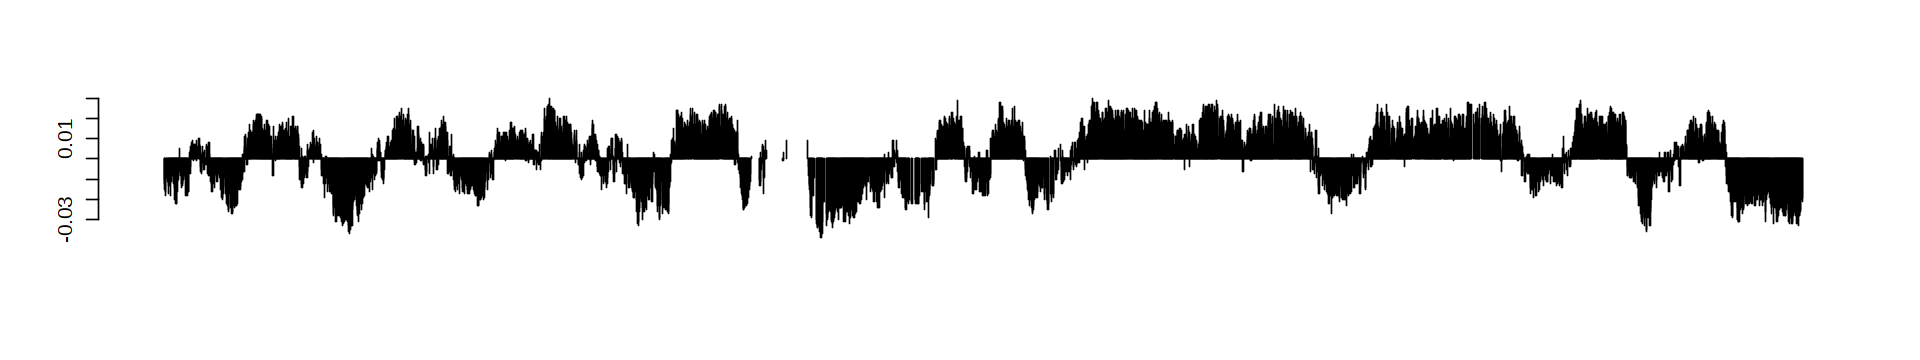

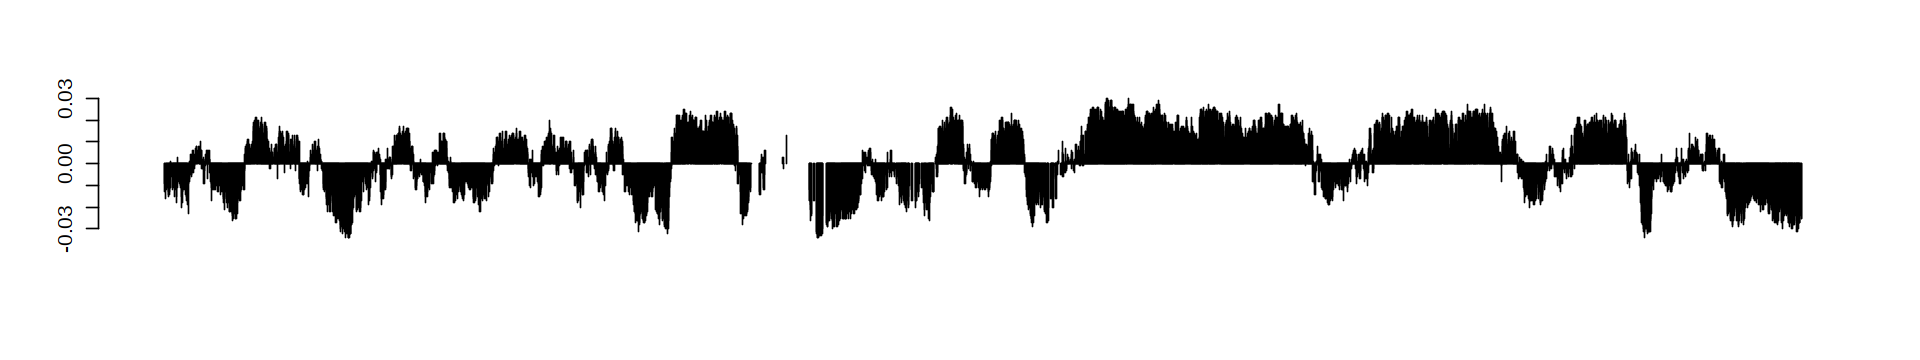

In [17]:
options(repr.plot.width=16,repr.plot.height=3)
barplot(RGnpc2[[2]] %>% filter(group_name=="PC1") %>% .$score)
barplot(eNnpc2[[2]] %>% filter(group_name=="PC1") %>% .$score)

In [7]:
RGnpc2 <- lapply(1:22,function(idx){
    pca.hic(RG.mat[[idx]], normPerExpected=TRUE, method="mean", npc=2) %>% as.data.frame() 
})

Estimate expected using mean contact frequency per genomic distance ...

Discard 676 'x' intervals

Discard 676 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 326 'x' intervals

Discard 326 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 255 'x' intervals

Discard 255 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 248 'x' intervals

Discard 248 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 239 'x' intervals

Discard 239 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 232 'x' intervals

Discard 232 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 217 'x' intervals

Discard 217 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 204 'x' intervals

Discard 204

In [8]:
eNnpc2 <- lapply(1:22,function(idx){
    pca.hic(eN.mat[[idx]], normPerExpected=TRUE, method="mean", npc=2) %>% as.data.frame() 
})

Estimate expected using mean contact frequency per genomic distance ...

Discard 678 'x' intervals

Discard 678 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 328 'x' intervals

Discard 328 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 255 'x' intervals

Discard 255 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 249 'x' intervals

Discard 249 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 237 'x' intervals

Discard 237 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 231 'x' intervals

Discard 231 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 218 'x' intervals

Discard 218 'y' intervals

Estimate expected using mean contact frequency per genomic distance ...

Discard 206 'x' intervals

Discard 206

In [ ]:
RG.p1 <- do.call(rbind,RGnpc2[c(1:8,10:20,22)]) %>% filter(group_name=="PC1")
RG.p2 <- do.call(rbind,RGnpc2[-c(1:8,10:20,22)]) %>% filter(group_name=="PC2")
RG.pc.beforeAdj <- rbind(RG.p1,RG.p2)

In [ ]:
iPC.p1 <- do.call(rbind,iPCnpc2[c(1:8,10:20,22)]) %>% filter(group_name=="PC1")
iPC.p2 <- do.call(rbind,iPCnpc2[-c(1:8,10:20,22)]) %>% filter(group_name=="PC2")
iPC.pc.beforeAdj <- rbind(iPC.p1,iPC.p2)

In [ ]:
eN.p1 <- do.call(rbind,eNnpc2[c(1:8,10:20,22)])%>% filter(group_name=="PC1")
eN.p2 <- do.call(rbind,eNnpc2[-c(1:8,10:20,22)])%>% filter(group_name=="PC2")
eN.pc.beforeAdj <- rbind(eN.p1,eN.p2)

In [ ]:
eN.peaks.gr <- read.table("./cleanData/MACS2.narrowPeak/human/humanBrain_1k_PFC/mergePeak/peaks//eN.mergeTocall.peak.FDR.filtered.narrowPeaks") %>%
set_names("seqnames","start","end","ID",c(paste0("V",5:11))) %>% makeGRangesFromDataFrame()

In [ ]:
iPC.peaks.gr <- read.table("./cleanData/MACS2.narrowPeak/human/humanBrain_1k_PFC/mergePeak/peaks//iPC.mergeTocall.peak.FDR.filtered.narrowPeaks") %>%
set_names("seqnames","start","end","ID",c(paste0("V",5:11))) %>% makeGRangesFromDataFrame()

In [ ]:
RG.peaks.gr <- read.table("./cleanData/MACS2.narrowPeak/human/humanBrain_1k_PFC/mergePeak/peaks//RG.mergeTocall.peak.FDR.filtered.narrowPeaks") %>%
set_names("seqnames","start","end","ID",c(paste0("V",5:11))) %>% makeGRangesFromDataFrame()

In [ ]:
#RG.pc.beforeAdj$seqnames <- paste0("chr",RG.pc.beforeAdj$seqnames)
#eN.pc.beforeAdj$seqnames <- paste0("chr",eN.pc.beforeAdj$seqnames)
iPC.pc.beforeAdj$seqnames <- paste0("chr",iPC.pc.beforeAdj$seqnames)

In [ ]:
RG.comp.adj <- lapply(paste0("chr",1:22),function(idx){
    dat <- RG.pc.beforeAdj %>% filter(seqnames==idx) 
    dat.gr <- makeGRangesFromDataFrame(dat,keep.extra.columns = T)
    dat.res <- dat %>% mutate(gene.counts=countOverlaps(dat.gr,RG.peaks.gr)) %>% 
     mutate(group=case_when(score <0 ~ "N",
                            score >0 ~ "P")) %>%
group_by(seqnames,group) %>% summarise(gene.counts.sum=sum(gene.counts))
    
if(dat.res[2,3] > dat.res[1,3]){
    dat$score.adj <- dat$score
}else(
    dat$score.adj <- -(dat$score)
)
    return(dat)
})

In [ ]:
iPC.comp.adj <- lapply(paste0("chr",1:22),function(idx){
    dat <- iPC.pc.beforeAdj %>% filter(seqnames==idx) 
    dat.gr <- makeGRangesFromDataFrame(dat,keep.extra.columns = T)
    dat.res <- dat %>% mutate(gene.counts=countOverlaps(dat.gr,iPC.peaks.gr)) %>% 
     mutate(group=case_when(score <0 ~ "N",
                            score >0 ~ "P")) %>%
group_by(seqnames,group) %>% summarise(gene.counts.sum=sum(gene.counts))
    
if(dat.res[2,3] > dat.res[1,3]){
    dat$score.adj <- dat$score
}else(
    dat$score.adj <- -(dat$score)
)
    return(dat)
})

In [ ]:
eN.comp.adj <- lapply(paste0("chr",1:22),function(idx){
    dat <- eN.pc.beforeAdj %>% filter(seqnames==idx) 
    dat.gr <- makeGRangesFromDataFrame(dat,keep.extra.columns = T)
    dat.res <- dat %>% mutate(gene.counts=countOverlaps(dat.gr,eN.peaks.gr)) %>% 
     mutate(group=case_when(score <0 ~ "N",
                            score >0 ~ "P")) %>%
group_by(seqnames,group) %>% summarise(gene.counts.sum=sum(gene.counts))
    
if(dat.res[2,3] > dat.res[1,3]){
    dat$score.adj <- dat$score
}else(
    dat$score.adj <- -(dat$score)
)
    return(dat)
})

In [ ]:
RG.comp.adj.dat <- do.call(rbind,RG.comp.adj) %>% 
mutate(comp=case_when(score.adj >0 ~ "A",
                       score.adj <0 ~ "B"))

In [ ]:
iPC.comp.adj.dat <- do.call(rbind,iPC.comp.adj) %>% 
mutate(comp=case_when(score.adj >0 ~ "A",
                       score.adj <0 ~ "B"))

In [ ]:
eN.comp.adj.dat <- do.call(rbind,eN.comp.adj) %>% 
mutate(comp=case_when(score.adj >0 ~ "A",
                       score.adj <0 ~ "B"))

In [ ]:
barplot(RG.comp.adj.dat %>% filter(seqnames=="chr19") %>% .$score.adj)
barplot(eN.comp.adj.dat %>% filter(seqnames=="chr19") %>% .$score.adj)

In [ ]:
write.table(RG.comp.adj.dat[,c(3:5,9,10)] %>% replace(is.na(.),0),"./cleanData/comp/humanBrain_500kb.HiTC.RG.comp.bedgraph",
           ,quote=F,col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(eN.comp.adj.dat[,c(3:5,9,10)]%>% replace(is.na(.),0),"./cleanData/comp/humanBrain_500kb.HiTC.eN.comp.bedgraph",
           ,quote=F,col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(iPC.comp.adj.dat[,c(3:5,9,10)]%>% replace(is.na(.),0),"./cleanData/comp/humanBrain_500kb.HiTC.iPC.comp.bedgraph",
           ,quote=F,col.names = F,row.names = F,sep="\t")

# macacaBrain

## 500Mb

In [ ]:
RG <- load_contacts(
    signal_path = './juicer/Macaca_1K_PFC/macacaBrain.all.1k.2batch.merge.RG.allValidPairs.hic',
    resolution = 500000,
    sample_name = "RG",
    scale_cis = TRUE,
    balancing = FALSE,
    scale_bp=NULL,
    colour = rgb(46,132,176,maxColorValue = 255))

In [ ]:
eN <- load_contacts(
    signal_path = './juicer/Macaca_1K_PFC/macacaBrain.all.1k.2batch.merge.eN.allValidPairs.hic',
    resolution = 500000,
    sample_name = "eN",
    scale_cis = TRUE,
    balancing = FALSE,
    scale_bp=NULL,
    colour = rgb(46,132,176,maxColorValue = 255))

In [ ]:
write.table(RG$MAT,"./juicer/Macaca_1K_PFC/RG.all.allValidPairs.hic.500kb.mat",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(eN$MAT,"./juicer/Macaca_1K_PFC/eN.all.allValidPairs.hic.500kb.mat",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(RG$IDX,"./juicer/Macaca_1K_PFC/RG.all.allValidPairs.hic.500kb.idx",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(eN$IDX,"./juicer/Macaca_1K_PFC/eN.all.allValidPairs.hic.500kb.idx",quote=F,
            col.names = F,row.names = F,sep="\t")

In [ ]:
RG.mat <- importC(con="./juicer/Macaca_1K_PFC/RG.all.allValidPairs.hic.500kb.mat",rm.trans = T,
        xgi.bed = "./juicer/Macaca_1K_PFC/RG.all.allValidPairs.hic.500kb.idx",
        ygi.bed = "./juicer/Macaca_1K_PFC/RG.all.allValidPairs.hic.500kb.idx")

In [ ]:
eN.mat <- importC(con="./juicer/Macaca_1K_PFC/eN.all.allValidPairs.hic.500kb.mat",,rm.trans = T,
        xgi.bed = "./juicer/Macaca_1K_PFC/eN.all.allValidPairs.hic.500kb.idx",
        ygi.bed = "./juicer/Macaca_1K_PFC/eN.all.allValidPairs.hic.500kb.idx")

In [ ]:
RGnpc2 <- lapply(1:20,function(idx){
    pca.hic(RG.mat[[idx]], normPerExpected=TRUE, method="loess", npc=2) %>% as.data.frame() 
})

In [ ]:
eNnpc2 <- lapply(1:20,function(idx){
    pca.hic(eN.mat[[idx]], normPerExpected=TRUE, method="loess", npc=2) %>% as.data.frame() 
})

In [ ]:
RG.p1 <- do.call(rbind,RGnpc2[-c(4,5)]) %>% filter(group_name=="PC1")
RG.p2 <- do.call(rbind,RGnpc2[c(4,5)]) %>% filter(group_name=="PC2")
RG.pc.beforeAdj <- rbind(RG.p1,RG.p2)

In [ ]:
eN.p1 <- do.call(rbind,eNnpc2[-c(4,5)])%>% filter(group_name=="PC1")
eN.p2 <- do.call(rbind,eNnpc2[c(4,5)])%>% filter(group_name=="PC2")
eN.pc.beforeAdj <- rbind(eN.p1,eN.p2)

In [ ]:
eN.peaks.gr <- read.table("./cleanData/MACS2.narrowPeak/macaca/1k/mergePeak/peaks//eN.mergeTocall.peak.FDR.filtered.narrowPeaks") %>%
set_names("seqnames","start","end","ID",c(paste0("V",5:11))) %>% makeGRangesFromDataFrame()

In [ ]:
RG.peaks.gr <- read.table("./cleanData/MACS2.narrowPeak/macaca/1k/mergePeak/peaks/RG.mergeTocall.peak.FDR.filtered.narrowPeaks") %>%
set_names("seqnames","start","end","ID",c(paste0("V",5:11))) %>% makeGRangesFromDataFrame()

In [ ]:
RG.comp.adj <- lapply(paste0("chr",1:20),function(idx){
    dat <- RG.pc.beforeAdj %>% filter(seqnames==idx) 
    dat.gr <- makeGRangesFromDataFrame(dat,keep.extra.columns = T)
    dat.res <- dat %>% mutate(gene.counts=countOverlaps(dat.gr,RG.peaks.gr)) %>% 
     mutate(group=case_when(score <0 ~ "N",
                            score >0 ~ "P")) %>%
group_by(seqnames,group) %>% summarise(gene.counts.sum=sum(gene.counts))
    
if(dat.res[2,3] > dat.res[1,3]){
    dat$score.adj <- dat$score
}else(
    dat$score.adj <- -(dat$score)
)
    return(dat)
})

In [ ]:
eN.comp.adj <- lapply(paste0("chr",1:20),function(idx){
    dat <- eN.pc.beforeAdj %>% filter(seqnames==idx) 
    dat.gr <- makeGRangesFromDataFrame(dat,keep.extra.columns = T)
    dat.res <- dat %>% mutate(gene.counts=countOverlaps(dat.gr,eN.peaks.gr)) %>% 
     mutate(group=case_when(score <0 ~ "N",
                            score >0 ~ "P")) %>%
group_by(seqnames,group) %>% summarise(gene.counts.sum=sum(gene.counts))
    
if(dat.res[2,3] > dat.res[1,3]){
    dat$score.adj <- dat$score
}else(
    dat$score.adj <- -(dat$score)
)
    return(dat)
})

In [ ]:
RG.comp.adj.dat <- do.call(rbind,RG.comp.adj) %>% 
mutate(comp=case_when(score.adj >0 ~ "A",
                       score.adj <0 ~ "B"))

In [ ]:
eN.comp.adj.dat <- do.call(rbind,eN.comp.adj) %>% 
mutate(comp=case_when(score.adj >0 ~ "A",
                       score.adj <0 ~ "B"))

In [ ]:
write.table(RG.comp.adj.dat[,c(3:5,9,10)] %>% replace(is.na(.),0),"./cleanData/comp/macacaBrain_500kb.HiTC.RG.comp.bedgraph",
           ,quote=F,col.names = F,row.names = F,sep="\t")

In [ ]:
write.table(eN.comp.adj.dat[,c(3:5,9,10)]%>% replace(is.na(.),0),"./cleanData/comp/macacaBrain_500kb.HiTC.eN.comp.bedgraph",
           ,quote=F,col.names = F,row.names = F,sep="\t")

In [ ]:
barplot(eN.comp.adj.dat %>% filter(seqnames=="chr2") %>% .$score.adj)
barplot(eNnpc2[[2]] %>% filter(group_name=="PC2") %>% .$score)

## 50Mb

In [3]:
RG <- load_contacts(
    signal_path = './juicer/Macaca_1K_PFC/macacaBrain.all.1k.2batch.merge.RG.allValidPairs.hic',
    resolution = 50000,
    sample_name = "RG",
    scale_cis = TRUE,
    balancing = FALSE,
    scale_bp=NULL,
    colour = rgb(46,132,176,maxColorValue = 255))

Reading data...



In [4]:
eN <- load_contacts(
    signal_path = './juicer/Macaca_1K_PFC/macacaBrain.all.1k.2batch.merge.eN.allValidPairs.hic',
    resolution = 50000,
    sample_name = "eN",
    scale_cis = TRUE,
    balancing = FALSE,
    scale_bp=NULL,
    colour = rgb(46,132,176,maxColorValue = 255))

Reading data...



In [9]:
write.table(RG$IDX,"./juicer/Macaca_1K_PFC/RG.all.allValidPairs.hic.50kb.idx",quote=F,
            col.names = F,row.names = F,sep="\t")

In [10]:
write.table(eN$IDX,"./juicer/Macaca_1K_PFC/eN.all.allValidPairs.hic.50kb.idx",quote=F,
            col.names = F,row.names = F,sep="\t")

In [11]:
write.table(RG$MAT,"./juicer/Macaca_1K_PFC/RG.all.allValidPairs.hic.50kb.mat",quote=F,
            col.names = F,row.names = F,sep="\t")

In [12]:
write.table(eN$MAT,"./juicer/Macaca_1K_PFC/eN.all.allValidPairs.hic.50kb.mat",quote=F,
            col.names = F,row.names = F,sep="\t")